***
# *Manejo de muestras de datos*
## Repaso de conceptos – Práctica 1
## Geoestadı́stica -Maestrı́a en Geomática UNLP

En un estudio global en todo el paı́s se registraron una serie de medi-
ciones meteorológicas mensuales durante el perı́odo 1981-2010. Con el
fin de caracterizar tendencias climatológicas se generó un base de datos.
En principio, como primera medida, se necesita identificar las principales
caracterı́sticas estadı́sticas de este set de datos con el fin de tener un re-
sultado rápido pero consistente. De esta manera se decidió que lo más
conveniente serı́a identificar en una tabla, por variable meteorológica, lo
siguiente:
    
***

In [155]:
################################################################
#
#   - Importacion de librerias
#   - Asignaciòn de alias
#
####################################################################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import geopandas as gpd


Vamos a cargar el dataset  del SMN

In [156]:
# Carga de datos
    
path = "datasets/"    
archivo = "SMN_estaciones_medias_mensuales_1989_2010.xls"
df = pd.read_excel(archivo)


In [157]:
df #ver el dataframe en crudo

,Unnamed: 0.1,Unnamed: 0,Estacion,mes,lat,long,Altura_(m),Numero,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm),Frecuencia_dias_Precipitacion_>0.1_mm
0,0,0,LA QUIACA,ene,-12.0,-63.333333,3459,87007,12.8,20.1,7.4,65.3,6.9,5.2,97.5,15.9
1,1,1,LA QUIACA,feb,-12.0,-63.333333,3459,87007,12.5,19.9,7,64.1,7.1,4.8,68.4,12.2
2,2,2,LA QUIACA,mar,-12.0,-63.333333,3459,87007,12.4,19.9,6.3,62.4,6.5,4.1,55.9,9.8
3,3,3,LA QUIACA,abril,-12.0,-63.333333,3459,87007,10.9,19.7,2.8,48.2,6.4,2.7,8.2,2.4
4,4,4,LA QUIACA,mayo,-12.0,-63.333333,3459,87007,6.9,17.3,-3,34.6,6,1.8,1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,835,847,BASE SAN MARTIN,ago,-60.5,-59.500000,7,89066,-11.5,-6.9,-16.8,S/D,18.9,5.9,S/D,S/D
836,836,848,BASE SAN MARTIN,sep,-60.5,-59.500000,7,89066,-8.9,-4.6,-13.9,S/D,17.5,6.3,S/D,S/D
837,837,849,BASE SAN MARTIN,oct,-60.5,-59.500000,7,89066,-5.9,-2.1,-10.2,S/D,20.3,6.4,S/D,S/D
838,838,850,BASE SAN MARTIN,nov,-60.5,-59.500000,7,89066,-2,1.2,-5.5,S/D,19.2,6.4,S/D,S/D


***
Para explorar los datos
```
#df
#df.info()
#df.head() #primeros filas del df
#df.head() #últimas filas del df
#df.columns #Index con el nombre de las columnas
#df.dtypes #tipo de dato por columna
```
***

In [158]:
#df
#df.info()
#df.head() #primeros filas del df
#df.head() #últimas filas del df
#df.columns #Index con el nombre de las columnas
#df.dtypes #tipo de dato por columna

El Dataset original contiene valor nulos o noData. Sin embargo python al cargar el csv/excel considera ese no data cómo texto. El tratamiento que se le dio al valor fue de ponerlo como nodata de numpy mediante un replace

In [159]:
df.replace("S/D", np.NaN, inplace = True) #reemplazar los "S/D"


Por otro lado, al poner 

```python
df.dtypes
```
vemos que algunos campos no tenían bien el tipo de texto. A continuación pongo varias formas de cambiar esto.

In [160]:
df.dtypes

Unnamed: 0.1                               int64
Unnamed: 0                                 int64
Estacion                                  object
mes                                       object
lat                                      float64
long                                     float64
Altura_(m)                                 int64
Numero                                     int64
Temperatura_(C)                           object
Temperatura_maxima_(C)                   float64
Temperatura_minima_(C)                    object
Humedad_relativa_(%)                      object
Velocidad_del_Viento_(km/h)               object
Nubosidad_total_(octavos)                 object
Precipitacion_(mm)                        object
Frecuencia_dias_Precipitacion_>0.1_mm     object
dtype: object

Cambiamos el tipo de columnas de string a float

- Forma 1
```python
df[["Temperatura_(C)","Temperatura_minima_(C)", "Humedad_relativa_(%)","Velocidad_del_Viento_(km/h)", "Nubosidad_total_(octavos)","Precipitacion_(mm)",
    "Frecuencia_dias_Precipitacion_>0.1_mm"]] = df[["Temperatura_(C)","Temperatura_minima_(C)", "Humedad_relativa_(%)","Velocidad_del_Viento_(km/h)", 
                                                    "Nubosidad_total_(octavos)","Precipitacion_(mm)","Frecuencia_dias_Precipitacion_>0.1_mm"]].astype(float)
```
- Forma 2
```python
df.iloc[:, [8,10,11,12,13,14,16]] =df.iloc[:, [8,10,11,12,13,14,16]].astype(float) #cambia la forma en que selecciono el rango
```
- Forma 3
```python
df.iloc[:, np.r_[8, 10:16]]=df.iloc[:, np.r_[8, 10:16]].astype(float)#cambia la forma en que selecciono el rango
```
- Forma 4 (forma sugerida por python segun la advertencia al usar iloc)
```python
rango= np.r_[8:16]
df[df.columns[rango]] = df[df.columns[rango]].astype(float)
```
- Forma 5 (forma utilizada por el profesor)
```python
for col in df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Estacion', 'mes'], axis = 1):
    df[col] = pd.to_numeric(df[col])```


In [161]:
#Finalmente vamos a utilizar ésta forma para cambiar el tipo de campo
rango= np.r_[8:16]
df[df.columns[rango]] = df[df.columns[rango]].astype(float)
df.dtypes

Unnamed: 0.1                               int64
Unnamed: 0                                 int64
Estacion                                  object
mes                                       object
lat                                      float64
long                                     float64
Altura_(m)                                 int64
Numero                                     int64
Temperatura_(C)                          float64
Temperatura_maxima_(C)                   float64
Temperatura_minima_(C)                   float64
Humedad_relativa_(%)                     float64
Velocidad_del_Viento_(km/h)              float64
Nubosidad_total_(octavos)                float64
Precipitacion_(mm)                       float64
Frecuencia_dias_Precipitacion_>0.1_mm    float64
dtype: object

Para calcular los rangos, solo vamos a utilizar los campos que tienen informaciòn númerica meteorológica (quitamos estación, mes, lat, long, altura y numero)



- ### 1. Rangos máximo y mı́nimo del set de datos.

```python
max=df.iloc[:, np.r_[8:16]].max() 
min= df.iloc[:, np.r_[8:16]].min()

```

In [162]:
max=df.iloc[:, np.r_[6,8:15]].max() 
min= df.iloc[:, np.r_[6,8:15]].min()


- ### 2. Valor medio, desviacion estándar.

```python
media=df.iloc[:, np.r_[8:16]].mean()
std=df.iloc[:, np.r_[8:16]].std()
```



```python
# Creating a dictionary by passing Series objects as values
frame = {'max': max,
         'min': min,
         'media': media,
         'std': std,
         'q1':q1,
         'q3':q3}
 
# Creating DataFrame by passing Dictionary
estadisticos = pd.DataFrame(frame)

```

In [163]:
#Maximo
max=df.iloc[:, np.r_[6,8:15]].max() 
#Minimo
min= df.iloc[:, np.r_[6,8:15]].min()
# Media
media=df.iloc[:, np.r_[6,8:15]].mean()
#Desviación estandard
std=df.iloc[:, np.r_[6,8:15]].std()
# Creating a dictionary by passing Series objects as values
frame = {'max': max,
         'min': min,
         'media': media,
         'std': std}
 
# Creating DataFrame by passing Dictionary
estadisticos = pd.DataFrame(frame)
estadisticos

,max,min,media,std
Altura_(m),3459.0,6.0,339.842857,491.592483
Temperatura_(C),27.9,-11.6,15.871838,6.996565
Temperatura_maxima_(C),35.1,-7.3,22.411667,7.443672
Temperatura_minima_(C),22.3,-16.8,10.225428,6.775667
Humedad_relativa_(%),88.1,30.1,68.044581,10.828241
Velocidad_del_Viento_(km/h),30.8,3.0,12.456497,5.390830
Nubosidad_total_(octavos),7.5,1.4,3.817191,0.764862
Precipitacion_(mm),237.0,0.0,69.334944,52.093688


- ### 3. Rango interquartil (RI) y porcentaje de datos fuera de este rango.
```python
q1=df.iloc[:, np.r_[8:16]].quantile(0.25)
q3=df.iloc[:, np.r_[8:16]].quantile(0.75)
ri=q3-q1
#df["Humedad_relativa_(%)"].quantile(0.25) #para calcular por campo
percentage_within_quantiles = ((df.iloc[:, np.r_[8:16]] >= q1) & (df.iloc[:, np.r_[8:16]] <= q3)).mean() * 100
percentage_outside_quantiles = 100 - percentage_within_quantiles

result_df = pd.DataFrame({
    'Percentage Within Quantiles': percentage_within_quantiles,
    'Percentage Outside Quantiles': percentage_outside_quantiles
})
result_df
```

In [164]:
q1=df.iloc[:, np.r_[8:16]].quantile(0.25)
q3=df.iloc[:, np.r_[8:16]].quantile(0.75)
ri=q3-q1
print('Rango Intercuartil por columna')
print(ri)
percentage_within_quantiles = ((df.iloc[:, np.r_[8:16]] >= q1) & (df.iloc[:, np.r_[8:16]] <= q3)).mean() * 100
percentage_outside_quantiles = 100 - percentage_within_quantiles

result_df = pd.DataFrame({
    'Percentage Within Quantiles': percentage_within_quantiles,
    'Percentage Outside Quantiles': percentage_outside_quantiles
})
result_df

Rango Intercuartil por columna
Temperatura_(C)                          10.50
Temperatura_maxima_(C)                   10.30
Temperatura_minima_(C)                    9.95
Humedad_relativa_(%)                     14.15
Velocidad_del_Viento_(km/h)               6.10
Nubosidad_total_(octavos)                 0.70
Precipitacion_(mm)                       85.20
Frecuencia_dias_Precipitacion_>0.1_mm     3.95
dtype: float64


,Percentage Within Quantiles,Percentage Outside Quantiles
Temperatura_(C),50.595238,49.404762
Temperatura_maxima_(C),50.952381,49.047619
Temperatura_minima_(C),48.571429,51.428571
Humedad_relativa_(%),48.333333,51.666667
Velocidad_del_Viento_(km/h),42.976190,57.023810
Nubosidad_total_(octavos),53.214286,46.785714
Precipitacion_(mm),48.214286,51.785714
Frecuencia_dias_Precipitacion_>0.1_mm,48.571429,51.428571


- ### 4. Cantidad y porcentaje de datos en el primer y último percentil (10% y 90%, respectivamente) 
```python
q10=df.iloc[:, np.r_[8:16]].quantile(0.10)
q90=df.iloc[:, np.r_[8:16]].quantile(0.90)
percentage_p10 = ((df.iloc[:, np.r_[8:16]] <= q10)).mean() * 100
percentage_p90 = ((df.iloc[:, np.r_[8:16]] >= q90)).mean() * 100

percentage_resto = 100 - percentage_p10 - percentage_p90

result_90 = pd.DataFrame({
    'percentage_p10': percentage_p10,
    'percentage_p90': percentage_p90,
    'percentage_resto': percentage_resto,

})
result_90
```

In [165]:
q10=df.iloc[:, np.r_[8:16]].quantile(0.10)
q90=df.iloc[:, np.r_[8:16]].quantile(0.90)
percentage_p10 = ((df.iloc[:, np.r_[8:16]] <= q10)).mean() * 100
percentage_p90 = ((df.iloc[:, np.r_[8:16]] >= q90)).mean() * 100

percentage_resto = 100 - percentage_p10 - percentage_p90

result_90 = pd.DataFrame({
    'percentage_p10': percentage_p10,
    'percentage_p90': percentage_p90,
    'percentage_resto': percentage_resto,

})
result_90

,percentage_p10,percentage_p90,percentage_resto
Temperatura_(C),10.357143,10.000000,79.642857
Temperatura_maxima_(C),10.000000,10.119048,79.880952
Temperatura_minima_(C),9.761905,9.761905,80.476190
Humedad_relativa_(%),9.880952,9.761905,80.357143
Velocidad_del_Viento_(km/h),8.452381,8.452381,83.095238
Nubosidad_total_(octavos),12.380952,10.952381,76.666667
Precipitacion_(mm),9.761905,9.880952,80.357143
Frecuencia_dias_Precipitacion_>0.1_mm,10.000000,9.880952,80.119048


Otra forma más facil es utilizando el método describe. 


In [166]:
df.iloc[:, np.r_[8:15]].describe()

,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm)
count,838.000000,840.000000,818.000000,812.000000,708.000000,826.000000,807.000000
mean,15.871838,22.411667,10.225428,68.044581,12.456497,3.817191,69.334944
std,6.996565,7.443672,6.775667,10.828241,5.390830,0.764862,52.093688
min,-11.600000,-7.300000,-16.800000,30.100000,3.000000,1.400000,0.000000
25%,11.200000,18.000000,5.525000,62.175000,8.700000,3.400000,23.400000
50%,16.300000,23.100000,10.700000,70.200000,11.300000,3.700000,59.000000
75%,21.700000,28.300000,15.475000,76.325000,14.800000,4.100000,108.600000
max,27.900000,35.100000,22.300000,88.100000,30.800000,7.500000,237.000000


- ### 5. Porcentaje de datos por fuera de los bigotes del boxplot, cuanto este esta definido como Q1 − 1.5 ∗ RI y Q3 + 1.5 ∗ RI.


In [167]:
def f(row):
    if row[colname] < lower_lim:
        val = 'Es Outlier'
    elif row[colname] > upper_lim:
        val = 'Es Outlier'
    else:
        val = 'No es Outlier'
    return val

In [168]:

outliers_df = pd.DataFrame()
#type(estadisticos)
rango= np.r_[8:15]

y= 0

for x in rango:
    
    colname = df.columns[x]
   # print(colname)
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    df['outlier'] = df.apply(f, axis=1)
    

    porcentaje =df['outlier'].value_counts(normalize=True).rename(colname)

    lower_lim_ = pd.Series({"lower_lim":lower_lim}).rename(colname)
    upper_lim_ = pd.Series({"upper_lim":upper_lim}).rename(colname)
    
    porcentaje= pd.concat([porcentaje, lower_lim_], axis=0)
    porcentaje= pd.concat([porcentaje, upper_lim_], axis=0)
   # porcentaje = porcentaje.append(lower_lim_).rename(colname)
   # porcentaje = porcentaje.append(upper_lim_).rename(colname)

   # print(porcentaje)
    outliers_df = pd.concat ([outliers_df,porcentaje], axis=1) 
    #outliers_df = outliers_df.append(porcentaje,ignore_index=False) 
    #print(outliers_df)

outliers_df

,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm)
No es Outlier,0.986905,0.978571,0.990476,0.983333,0.958333,0.933333,0.99881
Es Outlier,0.013095,0.021429,0.009524,0.016667,0.041667,0.066667,0.00119
lower_lim,-4.550000,2.550000,-9.400000,40.950000,-0.450000,2.350000,-104.40000
upper_lim,37.450000,43.750000,30.400000,97.550000,23.950000,5.150000,236.40000


- ### 6. Porcentaje de datos por fuera de los bigotes del boxplot, cuanto este esta definido como Q1 − 3 ∗ RI y Q3 + 3 ∗ RI

In [169]:

outliers_df = pd.DataFrame()
#type(estadisticos)
rango= np.r_[8:15]

y= 0

for x in rango:
    
    colname = df.columns[x]
   # print(colname)
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 3 * IQR
    upper_lim = Q3 + 3 * IQR
    df['outlier'] = df.apply(f, axis=1)
    

    porcentaje =df['outlier'].value_counts(normalize=True).rename(colname)

    lower_lim_ = pd.Series({"lower_lim":lower_lim}).rename(colname)
    upper_lim_ = pd.Series({"upper_lim":upper_lim}).rename(colname)
    
    porcentaje= pd.concat([porcentaje, lower_lim_], axis=0)
    porcentaje= pd.concat([porcentaje, upper_lim_], axis=0)
   # porcentaje = porcentaje.append(lower_lim_).rename(colname)
   # porcentaje = porcentaje.append(upper_lim_).rename(colname)

   # print(porcentaje)
    outliers_df3 = pd.concat ([outliers_df3,porcentaje], axis=1) 
    #outliers_df = outliers_df.append(porcentaje,ignore_index=False) 
    #print(outliers_df)

outliers_df3

,Precipitacion_(mm),Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm),Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm)
No es Outlier,1.0,1.0,1.0,1.000,1.000,1.0,0.978571,1.0,1.0,1.0,1.000,1.000,1.0,0.978571,1.0
lower_lim,-232.2,-20.3,-12.9,-24.325,19.725,-9.6,1.300000,-232.2,-20.3,-12.9,-24.325,19.725,-9.6,1.300000,-232.2
upper_lim,364.2,53.2,59.2,45.325,118.775,33.1,6.200000,364.2,53.2,59.2,45.325,118.775,33.1,6.200000,364.2
Es Outlier,NaN,NaN,NaN,NaN,NaN,NaN,0.021429,NaN,NaN,NaN,NaN,NaN,NaN,0.021429,NaN


### Por otro lado, para tener una idea “gráfica” de los datos identificados anteriomente, sobre un mapa, se solicita identificar:
- ### 1. Datos contenidos dentro del RI y por fuera del RI.

In [ ]:
Crear el nuevo dataframe con 1 y 0 para cada caso

In [189]:
# Create a copy of the DataFrame
df_copy =  df.iloc[:, np.r_[8:16]] .copy()

# Define a function to identify values within the interquartile range for each column
def in_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column >= lower_bound) & (column <= upper_bound)

# Apply the function to each column in the DataFrame
for column in df_copy.columns:
    df_copy[column] = in_iqr(df_copy[column])

# Convert boolean values to 1s and 0s
df_copy = df_copy.astype(int)
frames = [df_copy, df[["long","lat"]]]
 
df_ri = pd.concat(frames, axis =1)
len(df_ri)
df_ri

,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm),Frecuencia_dias_Precipitacion_>0.1_mm
0,1,1,1,1,1,0,1,0
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
835,0,0,0,0,1,0,0,0
836,0,0,0,0,1,0,0,0
837,0,0,0,0,1,0,0,0
838,1,0,1,0,1,0,0,0


Si lo quiero hacer con list comprehension


In [200]:
df_copy =  df.iloc[:, np.r_[8:16]] .copy()

# Define a lambda function to identify values within the interquartile range for each column
in_iqr = lambda column: ((column >= column.quantile(0.25) - 1.5 * (column.quantile(0.75) - column.quantile(0.25)))
                         & (column <= column.quantile(0.75) + 1.5 * (column.quantile(0.75) - column.quantile(0.25))))

# Apply the lambda function to each column in the DataFrame using list comprehensions
df_copy = pd.DataFrame({column: in_iqr(df_copy[column]) for column in df_copy.columns}).astype(int)

frames = [df_copy, df[["long","lat"]]]
 
df_ri = pd.concat(frames, axis =1)
len(df_ri)
df_ri

,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm),Frecuencia_dias_Precipitacion_>0.1_mm,long,lat
0,1,1,1,1,1,0,1,0,-63.333333,-12.0
1,1,1,1,1,1,1,1,1,-63.333333,-12.0
2,1,1,1,1,1,1,1,1,-63.333333,-12.0
3,1,1,1,1,1,1,1,1,-63.333333,-12.0
4,1,1,1,0,1,0,1,1,-63.333333,-12.0
...,...,...,...,...,...,...,...,...,...,...
835,0,0,0,0,1,0,0,0,-59.500000,-60.5
836,0,0,0,0,1,0,0,0,-59.500000,-60.5
837,0,0,0,0,1,0,0,0,-59.500000,-60.5
838,1,0,1,0,1,0,0,0,-59.500000,-60.5


In [148]:

#Si quiero hacerlo campo por campo  Ejemplo para humedad relativa
#Q1 = df["Humedad_relativa_(%)"].quantile(0.25)
#Q3 = df["Humedad_relativa_(%)"].quantile(0.75)
#IQR = Q3 - Q1
#lower_lim = Q1 - 1.5 * IQR
#upper_lim = Q3 + 1.5 * IQR
#df['outlier'] = df.apply(f, axis=1)
#df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]> Q1) & (df["Humedad_relativa_(%)"]< Q3) ,17, 10)
#df['mapLegend'] = np.where((df["Humedad_relativa_(%)"]> Q1) & (df["Humedad_relativa_(%)"]< Q3) ,"Dentro del RI", "Fuera del RI")


#Mapeo
#Datos contenidos dentro del RI y por fuera del RI
#Configuracion del Mapa
#xmin = df.long.min()-3
#xmax = df.long.max()+1
#ymin = df.lat.min()-3
#ymax= df.lat.max()+1
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)

#y=df.lat
#x=df.long
#t=df.mapCondition
#legend=df.mapLegend.drop_duplicates()
#plt.scatter(x, y, c=t,  alpha=0.1, edgecolors='none')
#plt.legend("mapCondition")
#plt.xlabel("X")
#plt.ylabel("Y")
#plt.title("Humedad Relativa")
#plt.legend(legend)
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
#plt.show()


Para hacer el mapa vamos a agregar información de contexto. Puede ser un shape con paises o la capa de Pais del IGN

In [265]:
df_ri_geo = gpd.GeoDataFrame(df_ri, 
    geometry = gpd.points_from_xy(df_ri['long'], df_ri['lat']), 
    crs = 'EPSG:4326')
df_ri_geo['color'] = np.where((df_ri_geo["Humedad_relativa_(%)"]== 1) ,'#2300A8','#00A658')
df_ri_geo['legend'] = np.where((df_ri_geo["Humedad_relativa_(%)"]== 1) ,'hola','chau')

#color = df_ri_geo["Humedad_relativa_(%)"].apply(lambda x: '#2300A8' if x == 0 else '#00A658')
pais = gpd.read_file("datasets/pais.zip")

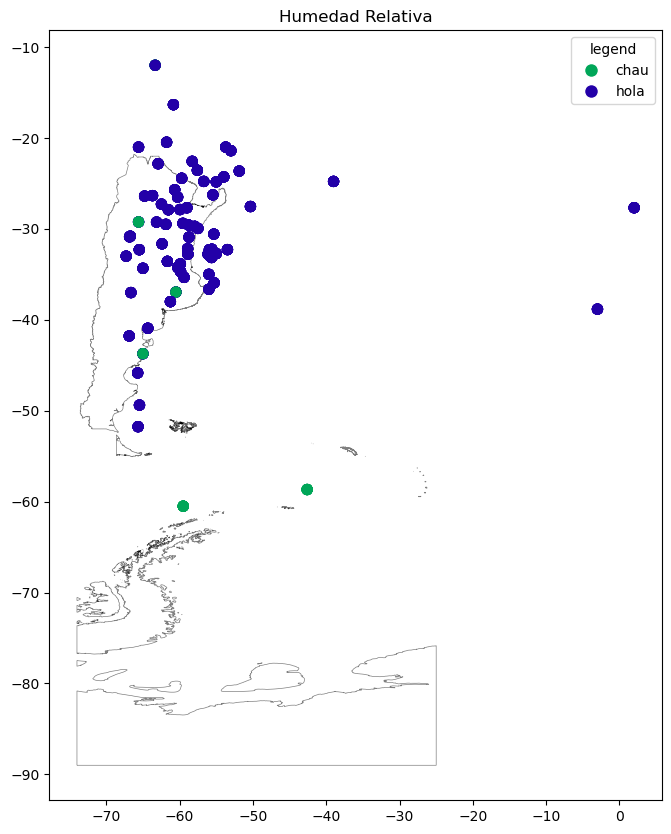

In [273]:
#Define the colors based on the 'colors' column in the point GeoDataFrame
color_dict = {'hola': '#2300A8', 'chau': '#00A658'} # Update this based on your specific values
# Create a map with two layers
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygon layer with thin line borders and some opacity
pais.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.5, facecolor='none')

# Plot the point layer with colors based on the 'colors' column
df_ri_geo.plot(ax=ax, color=df_ri_geo['legend'].map(color_dict), marker='o', markersize=50)
legend_column = 'legend'  # Replace with your actual column name
# Create handles for the legend based on unique values in the 'legend_column'
handles = [
    plt.Line2D(
        [0], [0],                     # These are just dummy values for the line
        marker='o',                   # Marker style (circle)
        color='w',                    # Marker edge color (white)
        markerfacecolor=color_dict[i], # Marker fill color based on 'colors' column
        markersize=10,                 # Marker size
        label=str(i)                   # Legend label based on the unique value in 'legend_column'
    ) for i in sorted(df_ri_geo['legend'].unique())
]

# Add the legend to the plot
ax.legend(handles=handles, title=legend_column, loc='upper right')
plt.title("Humedad Relativa")

# Display the map
plt.show()

### 2. Datos en el primer y último percentil (10% y 90%, respectivamente)

Vamos a usar otra forma aunque se puede replicar la del punto 1

In [333]:
rango= np.r_[8:16]
df_copy =  df.iloc[:, np.r_[8:16]] .copy()
colnames= df_copy.columns

col =colnames[1] # para seleccionar columna de esta forma podriamos hacer un loop
df_copy1 =  df_copy[col]
q10 = df_copy1.quantile(0.10)
q90 = df_copy1.quantile(0.90)

frames = [df_copy1, df[["long","lat"]]]
 
df_1090 = pd.concat(frames, axis =1)
#df_1090 =  df_1090[df_1090[([col]<q10) | (df_1090[col]>q90) ]]
df_1090=df_1090[(df_1090[col]<q10) |(df_1090[col]>q90)]
df_1090['legend'] = np.where((df_1090[col]<q10),"Menor al 10%", "Mayor al 90%")

#Importante: pasar a gpd el df
df_1090 = gpd.GeoDataFrame(df_1090, 
    geometry = gpd.points_from_xy(df_1090['long'], df_1090['lat']), 
    crs = 'EPSG:4326')

#pais = gpd.read_file("datasets/pais.zip")


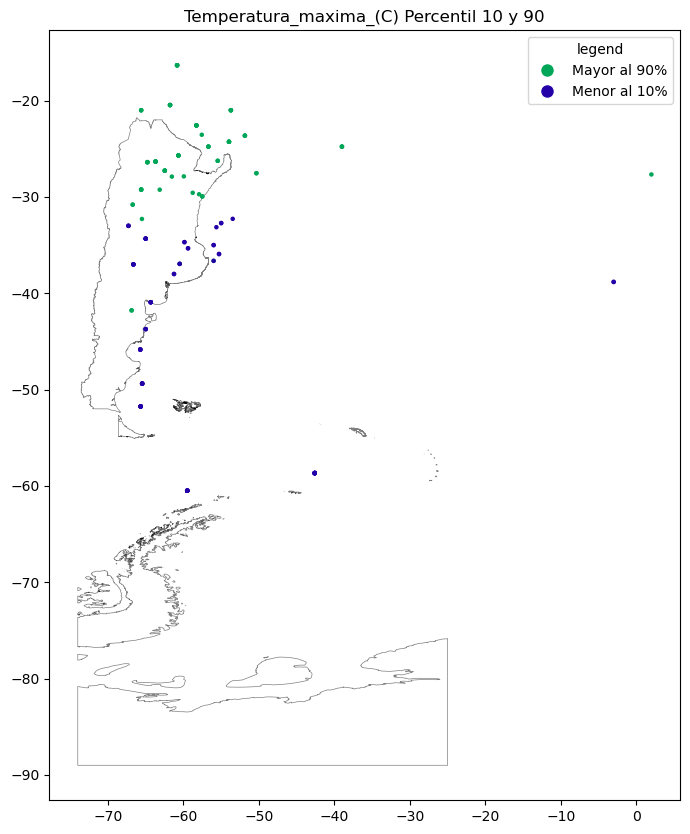

In [338]:
#Define the colors based on the 'colors' column in the point GeoDataFrame
color_dict = {'Menor al 10%': '#2300A8', 'Mayor al 90%': '#00A658'} # Update this based on your specific values
# Create a map with two layers
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygon layer with thin line borders and some opacity
pais.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.5, facecolor='none')

# Plot the point layer with colors based on the 'colors' column
df_1090.plot(ax=ax, color=df_1090['legend'].map(color_dict), marker='o', markersize=5)
legend_column = 'legend'  # Replace with your actual column name
# Create handles for the legend based on unique values in the 'legend_column'
handles = [
    plt.Line2D(
        [0], [0],                     # These are just dummy values for the line
        marker='o',                   # Marker style (circle)
        color='w',                    # Marker edge color (white)
        markerfacecolor=color_dict[i], # Marker fill color based on 'colors' column
        markersize=10,                 # Marker size
        label=str(i)                   # Legend label based on the unique value in 'legend_column'
    ) for i in sorted(df_1090['legend'].unique())
]

# Add the legend to the plot
ax.legend(handles=handles, title=legend_column, loc='upper right')
plt.title("Temperatura_maxima_(C) Percentil 10 y 90")

# Display the map
plt.show()






### 3. Datos por fuera de los bigotes del boxplot, cuando éste esta definido como Q1 − 1.5 ∗ RI y Q3 + 1.5 ∗ RI.

In [348]:
rango= np.r_[8:16]
df_copy =  df.iloc[:, np.r_[8:16]] .copy()
colnames= df_copy.columns

col =colnames[4] # para seleccioonar columna

# Define a lambda function to identify values within the interquartile range for each column
in_iqr = lambda column: ((column >= column.quantile(0.25) - 1.5 * (column.quantile(0.75) - column.quantile(0.25)))
                         & (column <= column.quantile(0.75) + 1.5 * (column.quantile(0.75) - column.quantile(0.25))))

# Apply the lambda function to each column in the DataFrame using list comprehensions
df_copy = pd.DataFrame({column: in_iqr(df_copy[column]) for column in df_copy.columns}).astype(int)

frames = [df_copy, df[["long","lat"]]]
 
df_outlier15 = pd.concat(frames, axis =1)
df_outlier15=df_outlier15[(df_outlier15[col]==0)]

#Importante: pasar a gpd el df
df_outlier15 = gpd.GeoDataFrame(df_outlier15, 
    geometry = gpd.points_from_xy(df_outlier15['long'], df_outlier15['lat']), 
    crs = 'EPSG:4326')

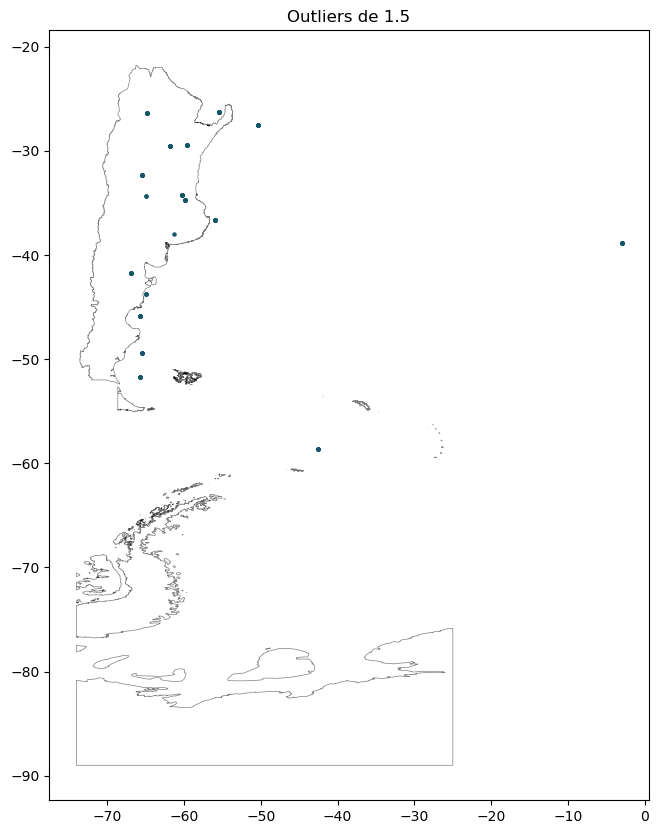

In [351]:
#Define the colors based on the 'colors' column in the point GeoDataFrame
#color_dict = {'Menor al 10%': '#2300A8', 'Mayor al 90%': '#00A658'} # Update this based on your specific values
# Create a map with two layers
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygon layer with thin line borders and some opacity
pais.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.5, facecolor='none')

# Plot the point layer with colors based on the 'colors' column
df_outlier15.plot(ax=ax, color='#145769', marker='o', markersize=5)

plt.title("Outliers de 1.5")

# Display the map
plt.show()



### 4. Datos por fuera de los bigotes del boxplot, cuando éste esta definido como Q1 − 3 ∗ RI y Q3 + 3 ∗ RI.

In [355]:
rango= np.r_[8:16]
df_copy =  df.iloc[:, np.r_[8:16]] .copy()
colnames= df_copy.columns

col =colnames[4] # para seleccioonar columna

# Define a lambda function to identify values within the interquartile range for each column
in_iqr = lambda column: ((column >= column.quantile(0.25) - 3 * (column.quantile(0.75) - column.quantile(0.25)))
                         & (column <= column.quantile(0.75) + 3 * (column.quantile(0.75) - column.quantile(0.25))))

# Apply the lambda function to each column in the DataFrame using list comprehensions
df_copy = pd.DataFrame({column: in_iqr(df_copy[column]) for column in df_copy.columns}).astype(int)

frames = [df_copy, df[["long","lat"]]]
 
df_outlier3 = pd.concat(frames, axis =1)
df_outlier3=df_outlier3[(df_outlier3[col]==0)]

#Importante: pasar a gpd el df
df_outlier3 = gpd.GeoDataFrame(df_outlier3, 
    geometry = gpd.points_from_xy(df_outlier3['long'], df_outlier3['lat']), 
    crs = 'EPSG:4326')

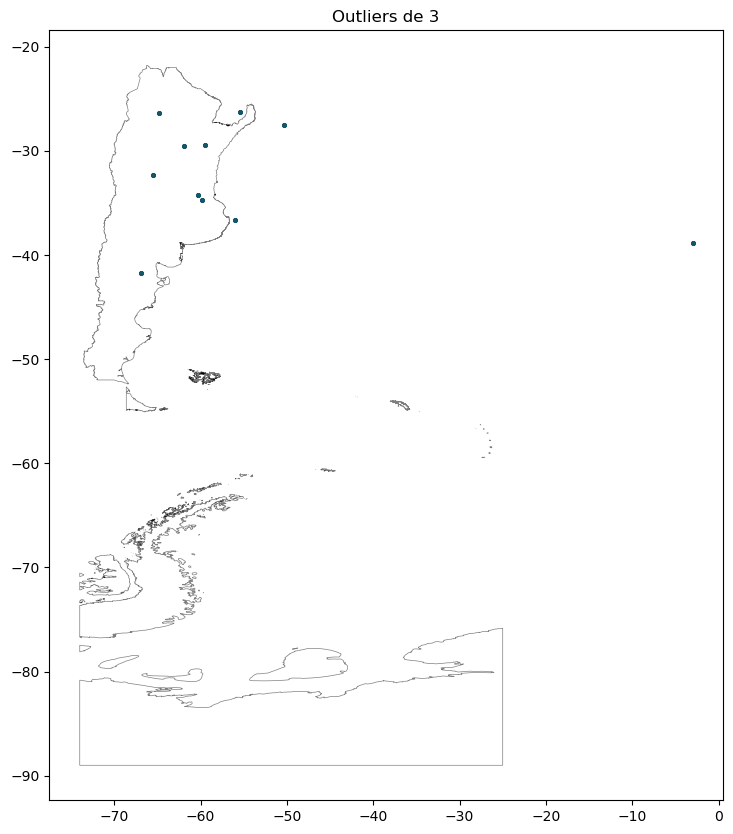

In [356]:
#Define the colors based on the 'colors' column in the point GeoDataFrame
#color_dict = {'Menor al 10%': '#2300A8', 'Mayor al 90%': '#00A658'} # Update this based on your specific values
# Create a map with two layers
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygon layer with thin line borders and some opacity
pais.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.5, facecolor='none')

# Plot the point layer with colors based on the 'colors' column
df_outlier3.plot(ax=ax, color='#145769', marker='o', markersize=5)

plt.title("Outliers de 3")

# Display the map
plt.show()



<Axes: >

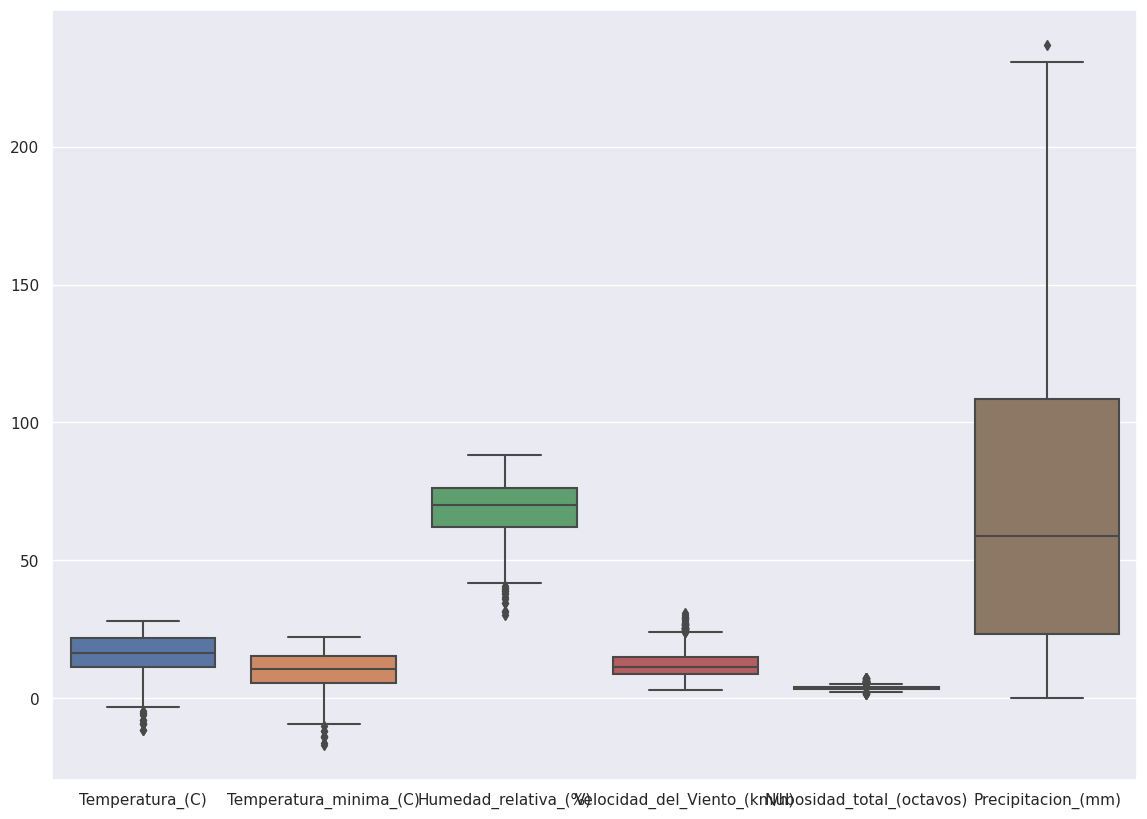

In [357]:
all_data= df.iloc[:, np.r_[2,3,8, 10:15]]
labels = all_data.columns.tolist()
sns.set(rc={"figure.figsize":(14, 10),}) #width=8, height=4
sns.boxplot(data=all_data)


Lo que hemos hecho, fundamentalmente en la visualización sobre los mapas, fue aplicar diferentes criterios para identificar datos anómalos o
outliers. En gral, cuando se determina el criterio adecuado, en función del set de datos, esa información se quita de set original para continuar
el análisis con el resto de los datos.
Por este motivo, se solicita armar un nuevo set de datos del cual se extraigan los outliers calculados del set original. De este nuevo set, pedimos
recalcular:

In [254]:

    Q1 = df["Humedad_relativa_(%)"].quantile(0.25)
    Q3 = df["Humedad_relativa_(%)"].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    df['outlier'] = df.apply(f, axis=1)


In [255]:
df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]> Q1) & (df["Humedad_relativa_(%)"]< Q3) ,17, 10)
df['mapLegend'] = np.where((df["Humedad_relativa_(%)"]> Q1) & (df["Humedad_relativa_(%)"]< Q3) ,"Dentro del RI", "Fuera del RI")


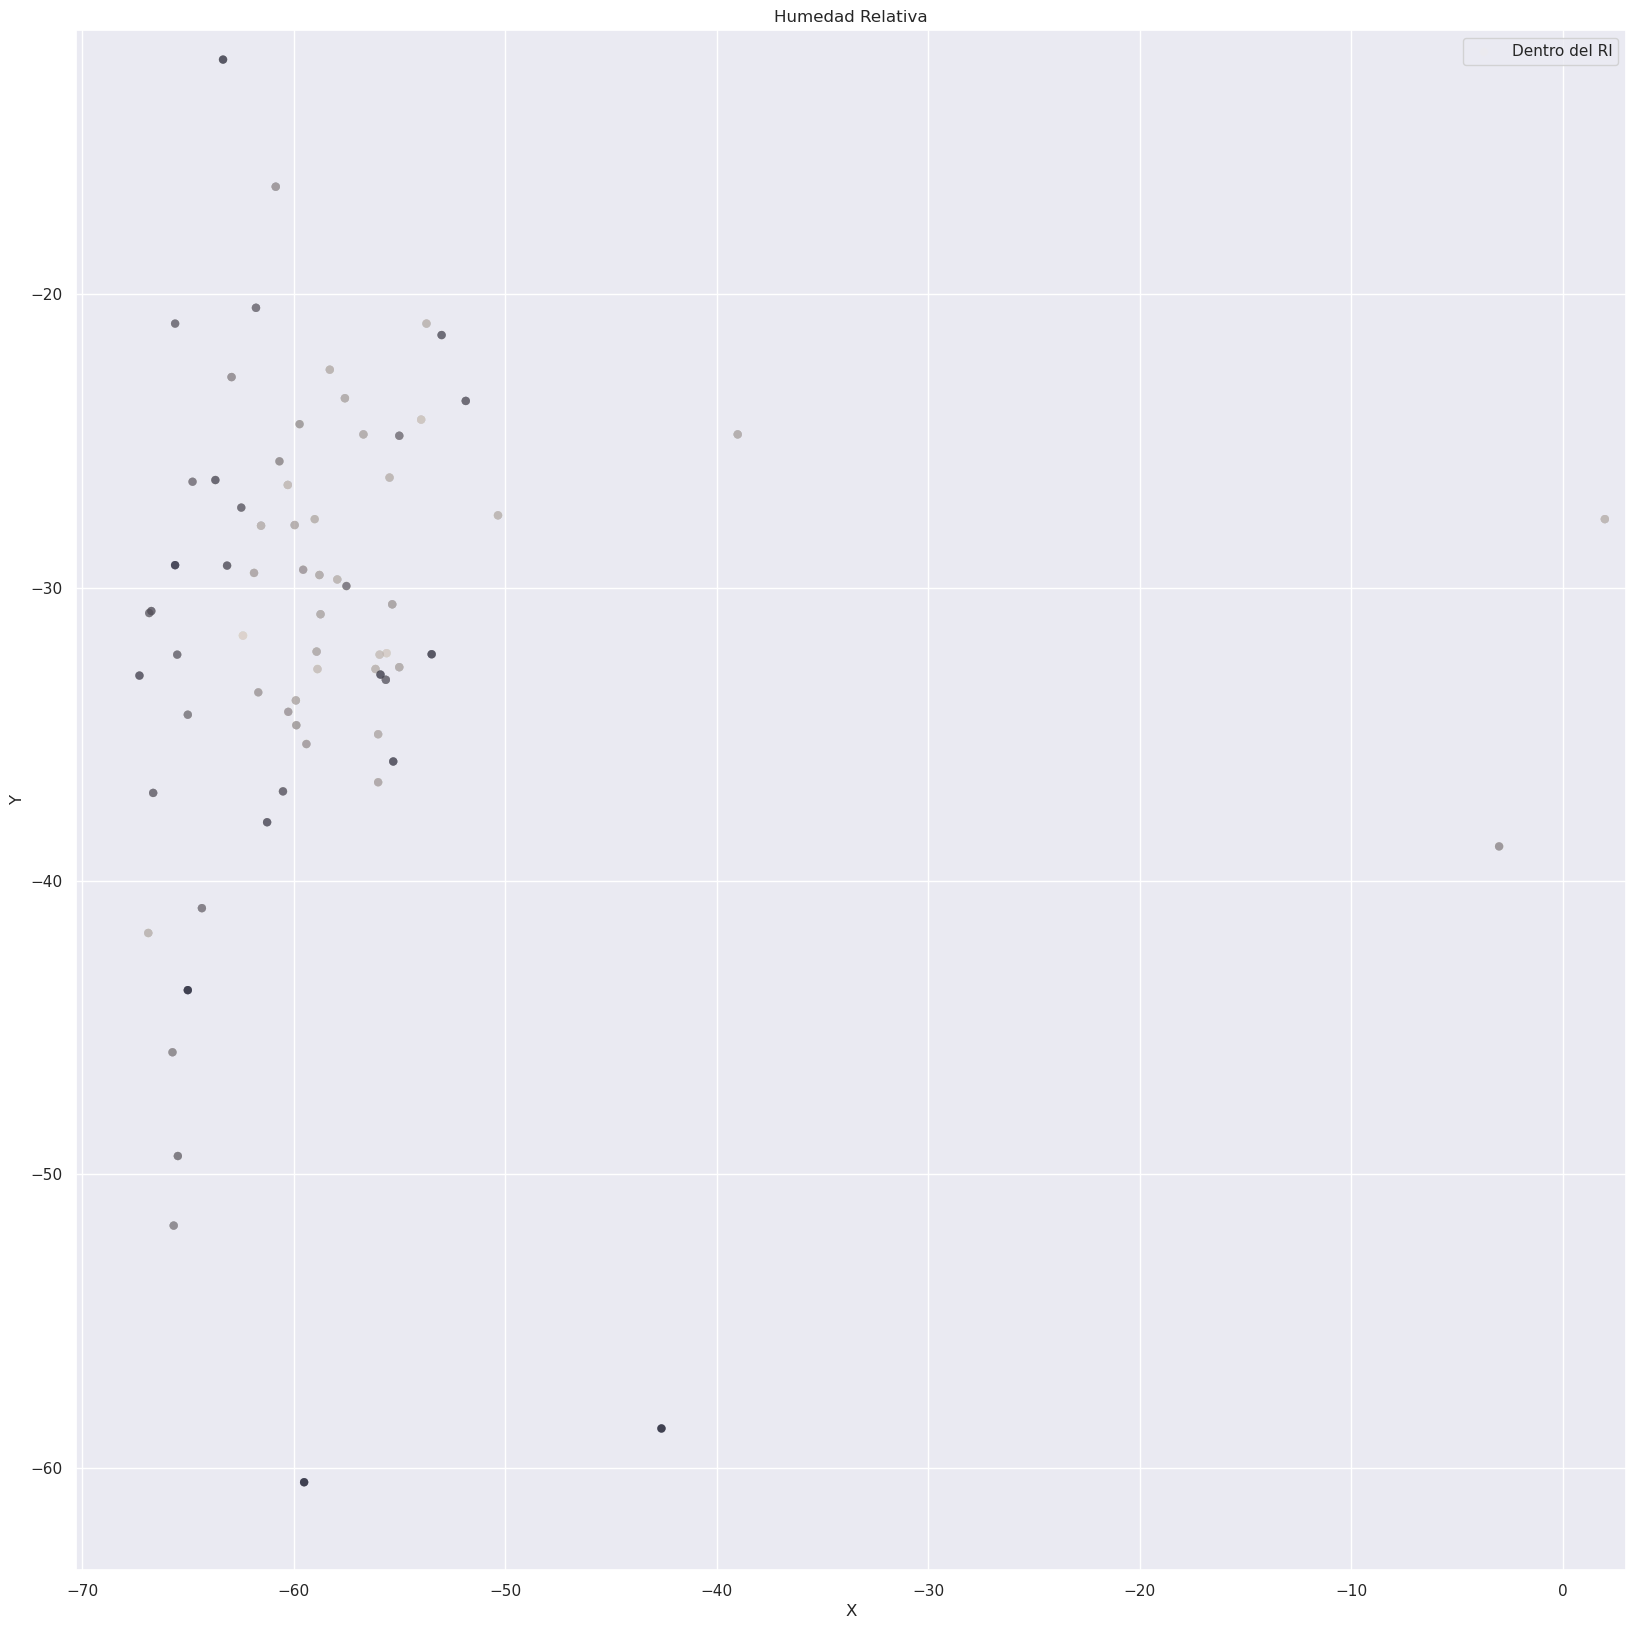

In [256]:
#Datos contenidos dentro del RI y por fuera del RI
#Configuracion del Mapa
xmin = df.long.min()-3
xmax = df.long.max()+1
ymin = df.lat.min()-3
ymax= df.lat.max()+1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

y=df.lat
x=df.long
t=df.mapCondition
legend=df.mapLegend.drop_duplicates()
plt.scatter(x, y, c=t,  alpha=0.1, edgecolors='none')
#plt.legend("mapCondition")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Humedad Relativa")
plt.legend(legend)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()



In [257]:
#Datos en el primer y último percentil (10% y 90%, respectivamente) 

def percentile(row):
    if row[colname] < percentil10:
        val = 'Percentil 10'
    elif row[colname] > percentil90:
        val = 'Percentil 90'
    else:
        val = 'Entre 10 y 90'
    return val

In [258]:
#Datos en el primer y último percentil (10% y 90%, respectivamente) 

for x in rango:
    
    colname = df.columns[x]
    percentil10 = df[colname].quantile(0.10)
    percentil90 = df[colname].quantile(0.90)
    df['percentil'] = df.apply(percentile, axis=1)
    

    #porcentaje =df['outlier'].value_counts(normalize=True).rename(colname)



In [259]:
#De muestra trabajamos con el campo de humedad
    
percentil10 = df["Humedad_relativa_(%)"].quantile(0.10)
percentil90 = df["Humedad_relativa_(%)"].quantile(0.90)
df['percentil'] = df.apply(percentile, axis=1)
    
#df[["percentil","Humedad_relativa_(%)"]]


In [95]:
len(df)

840

In [144]:

df['mapCondition'] = 0
df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]< percentil10) ,17, df['mapCondition'] )
df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]> percentil90) ,5, df['mapCondition'] )


#df.mapCondition.drop_duplicates()

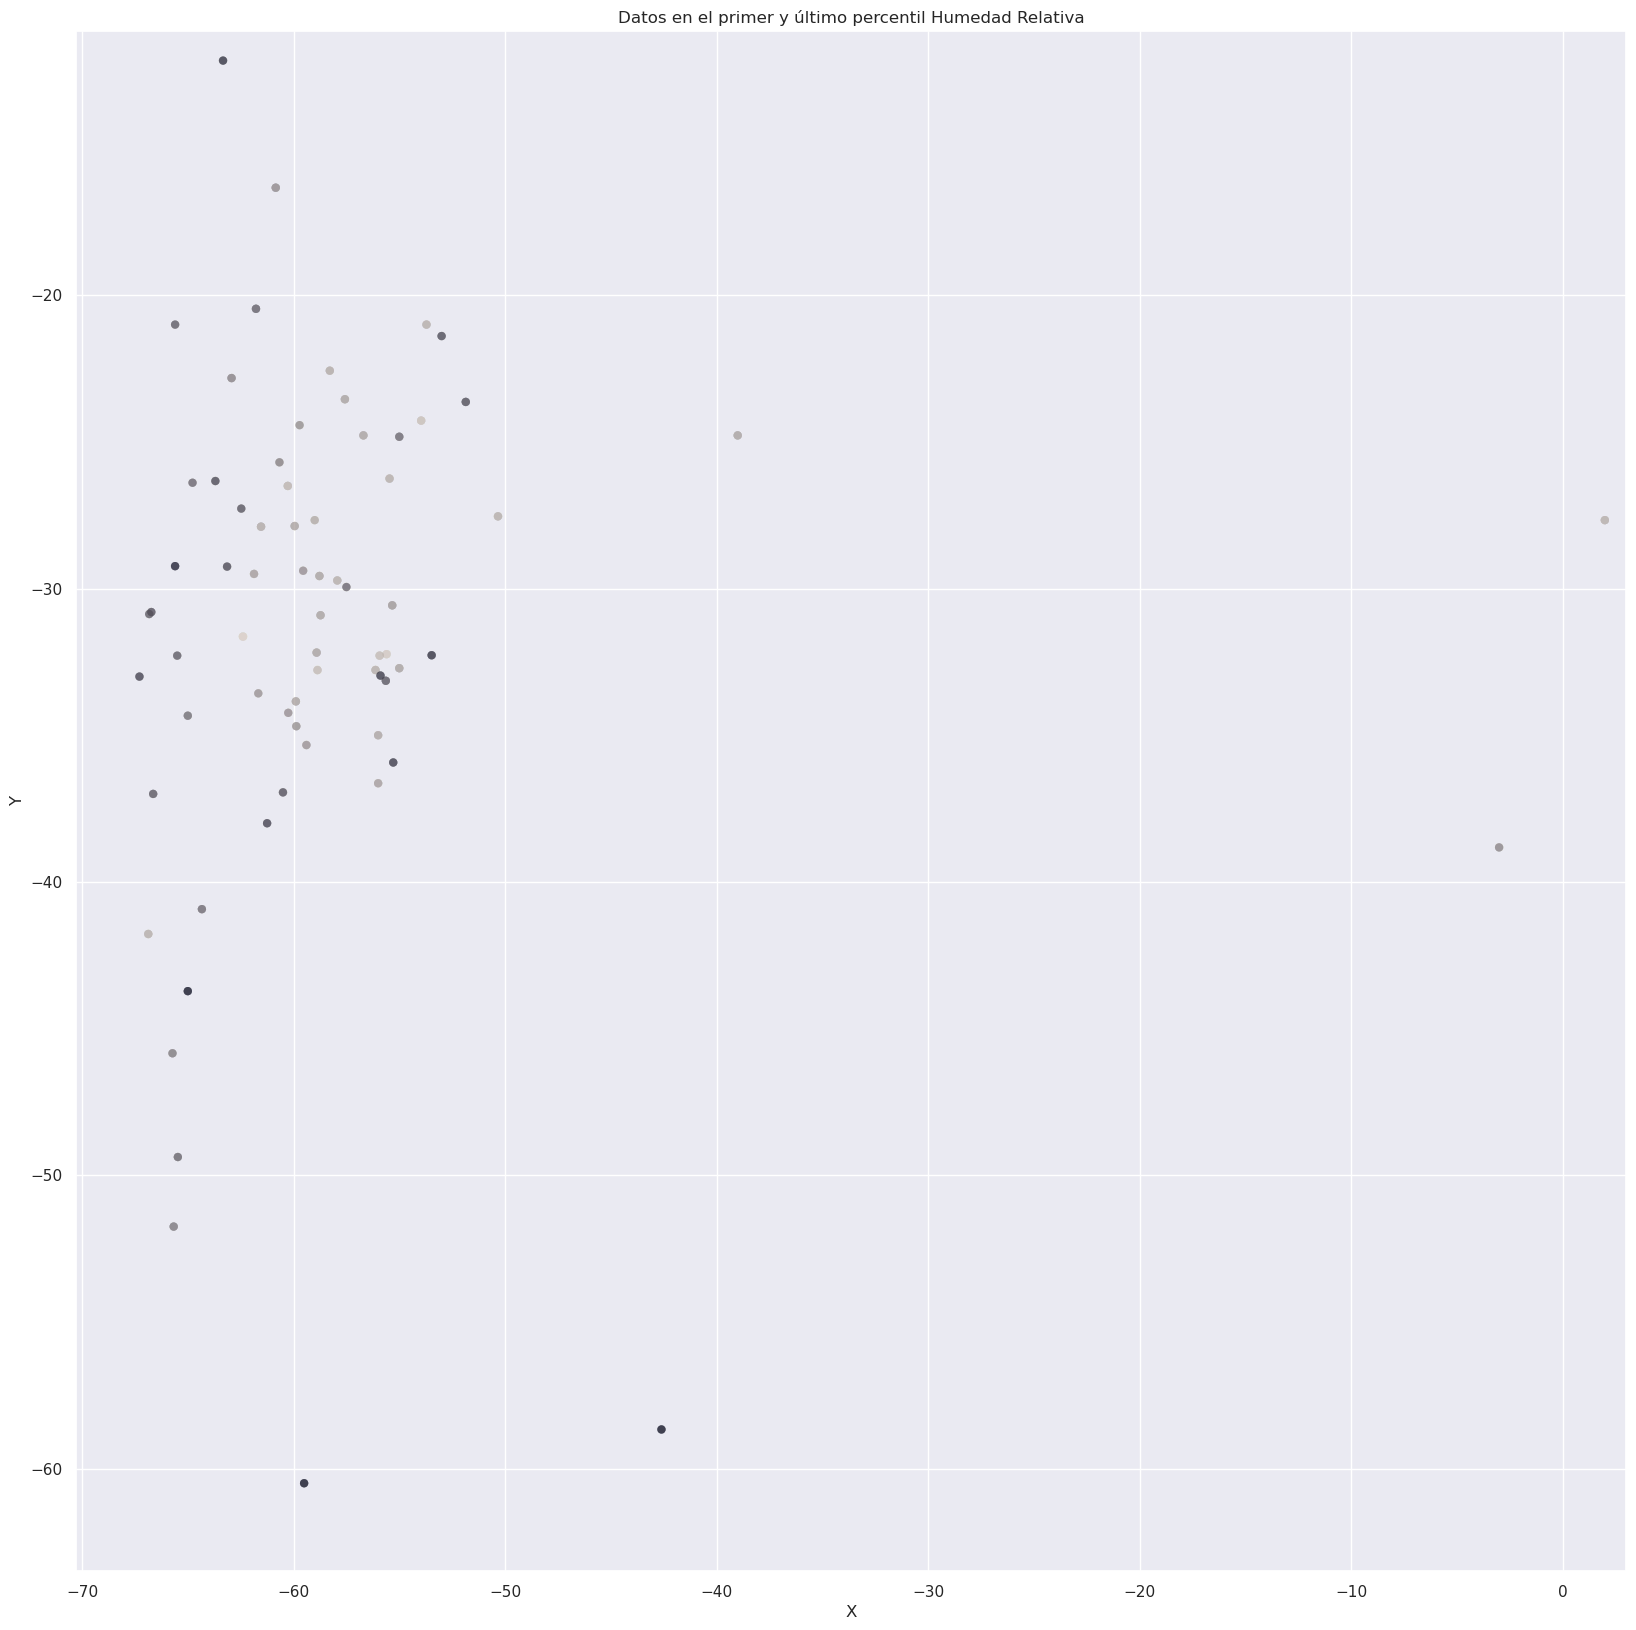

In [260]:
#Datos en el primer y último percentil (10% y 90%, respectivamente) 

#df['mapCondition'] = 0
#df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]< percentil10) | df["Humedad_relativa_(%)"] > percentil10) ,17, 5)
#df['mapLegend'] = np.where(df["Humedad_relativa_(%)"]> IQR, "Mayor a IQR", "Menor a IQR")
#df['mapCondition1'] = df["Humedad_relativa_(%)"]- IQR
#Configuracion del Mapa
xmin = df.long.min()-3
xmax = df.long.max()+1
ymin = df.lat.min()-3
ymax= df.lat.max()+1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

y=df.lat
x=df.long
t=df.mapCondition
#t2=(df.mapCondition1 /10)**2
#legend=df.mapLegend .drop_duplicates()
plt.scatter(x, y, c=t,  alpha=0.1, edgecolors='none')
#plt.legend("mapCondition")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Datos en el primer y último percentil Humedad Relativa")
#plt.legend(legend)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()



In [261]:
#Datos por fuera de los bigotes del boxplot, cuando éste esta definido como Q1 − 1.5 ∗ RI y Q3 + 1.5 ∗ RI.
#De muestra trabajamos con el campo de humedad
    

Q1 = df["Humedad_relativa_(%)"].quantile(0.25)
Q3 = df["Humedad_relativa_(%)"].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
df['outlier'] = df.apply(f, axis=1)

In [262]:
df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]> lower_lim) & (df["Humedad_relativa_(%)"]< upper_lim) ,17, 10)
df['mapLegend'] = np.where((df["Humedad_relativa_(%)"]> Q1) & (df["Humedad_relativa_(%)"]< Q3) ,"Dentro del RI", "Fuera del RI")

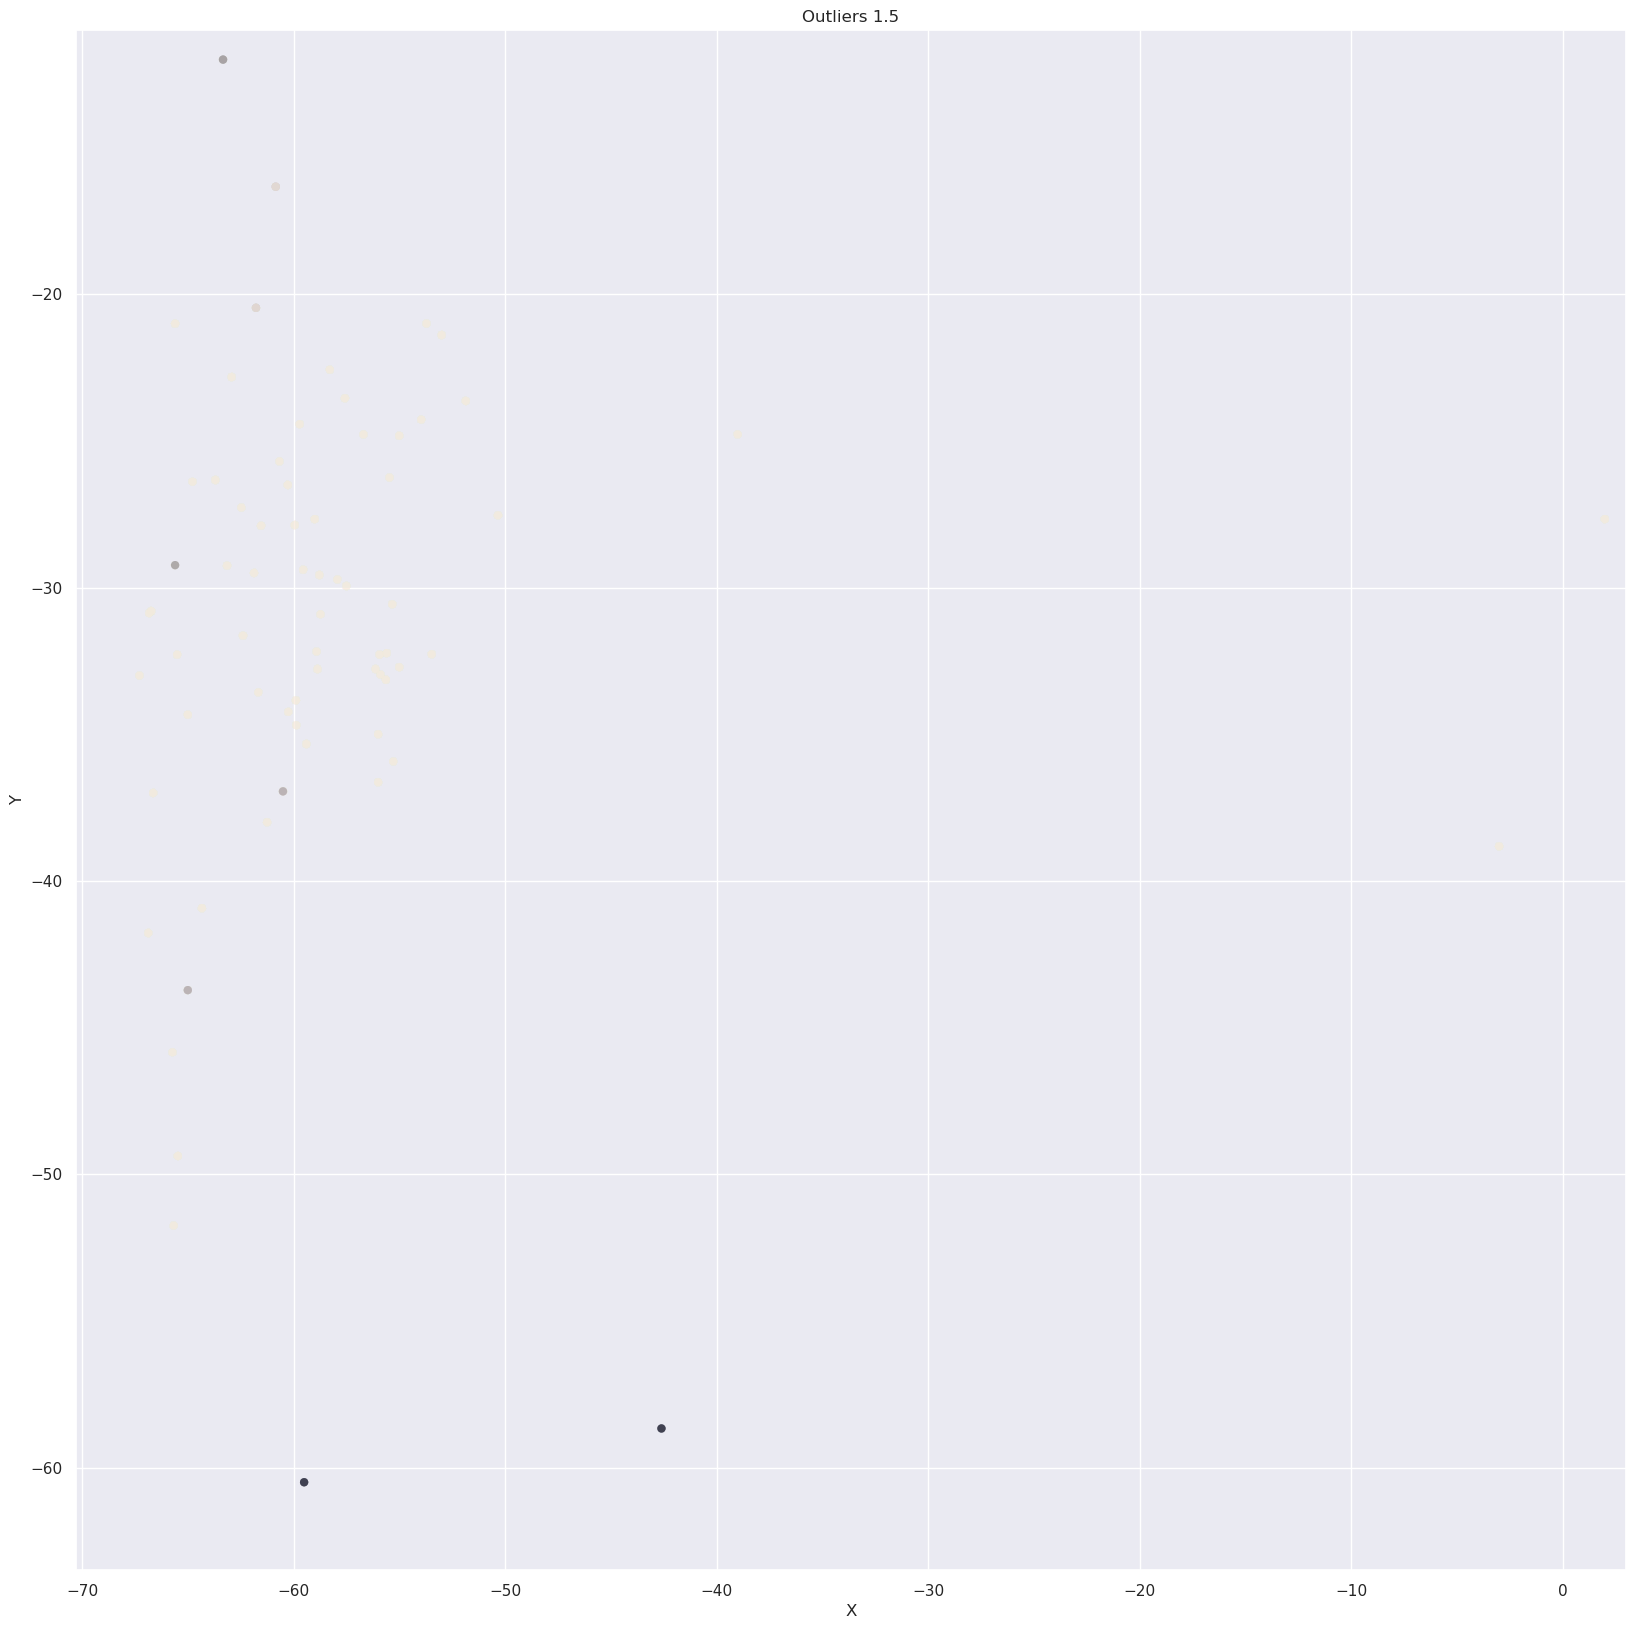

In [263]:
#Datos en el primer y último percentil (10% y 90%, respectivamente) 

#df['mapCondition'] = 0
#df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]< percentil10) | df["Humedad_relativa_(%)"] > percentil10) ,17, 5)
#df['mapLegend'] = np.where(df["Humedad_relativa_(%)"]> IQR, "Mayor a IQR", "Menor a IQR")
#df['mapCondition1'] = df["Humedad_relativa_(%)"]- IQR
#Configuracion del Mapa
xmin = df.long.min()-3
xmax = df.long.max()+1
ymin = df.lat.min()-3
ymax= df.lat.max()+1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

y=df.lat
x=df.long
t=df.mapCondition
#t2=(df.mapCondition1 /10)**2
#legend=df.mapLegend .drop_duplicates()
plt.scatter(x, y, c=t,  alpha=0.1, edgecolors='none')
#plt.legend("mapCondition")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Outliers 1.5")
#plt.legend(legend)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()



In [264]:
#Outliers 3
#De muestra trabajamos con el campo de humedad
    

Q1 = df["Humedad_relativa_(%)"].quantile(0.25)
Q3 = df["Humedad_relativa_(%)"].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 3 * IQR
upper_lim = Q3 + 3 * IQR
df['outlier'] = df.apply(f, axis=1)

In [265]:
df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]> lower_lim) & (df["Humedad_relativa_(%)"]< upper_lim) ,17, 10)
df['mapLegend'] = np.where((df["Humedad_relativa_(%)"]> Q1) & (df["Humedad_relativa_(%)"]< Q3) ,"Dentro del RI", "Fuera del RI")

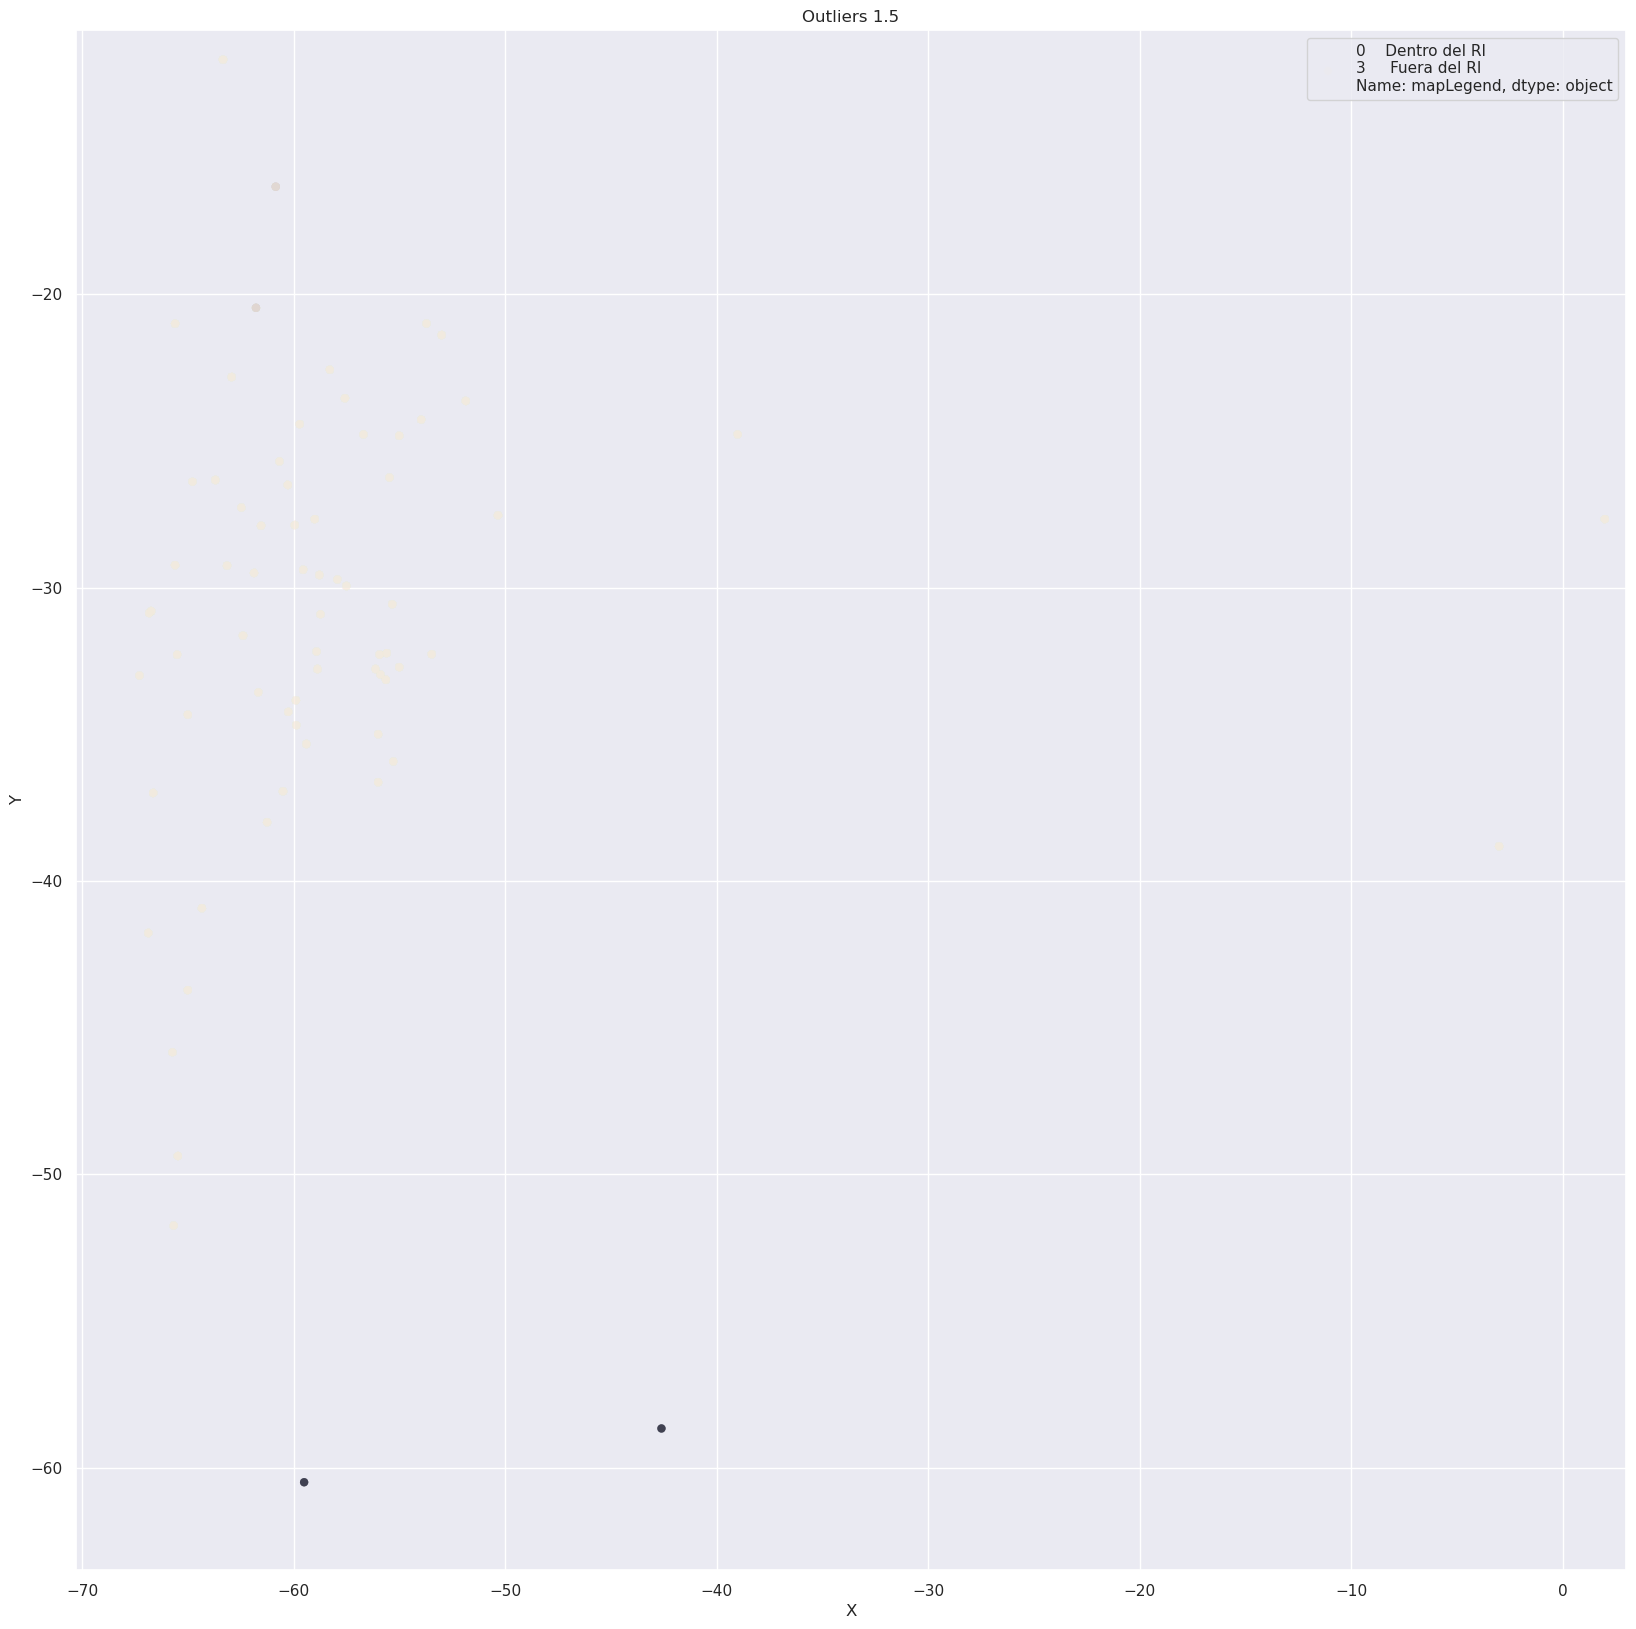

In [266]:
#Datos en el primer y último percentil (10% y 90%, respectivamente) 

#df['mapCondition'] = 0
#df['mapCondition'] = np.where((df["Humedad_relativa_(%)"]< percentil10) | df["Humedad_relativa_(%)"] > percentil10) ,17, 5)
#df['mapLegend'] = np.where(df["Humedad_relativa_(%)"]> IQR, "Mayor a IQR", "Menor a IQR")
#df['mapCondition1'] = df["Humedad_relativa_(%)"]- IQR
#Configuracion del Mapa
xmin = df.long.min()-3
xmax = df.long.max()+1
ymin = df.lat.min()-3
ymax= df.lat.max()+1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

y=df.lat
x=df.long
t=df.mapCondition
#t2=(df.mapCondition1 /10)**2
legend=df.mapLegend.drop_duplicates()
plt.scatter(x, y, c=t,  alpha=0.1, edgecolors='none', label= legend)
#plt.legend("mapCondition")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Outliers 1.5")
plt.legend()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()



<Axes: >

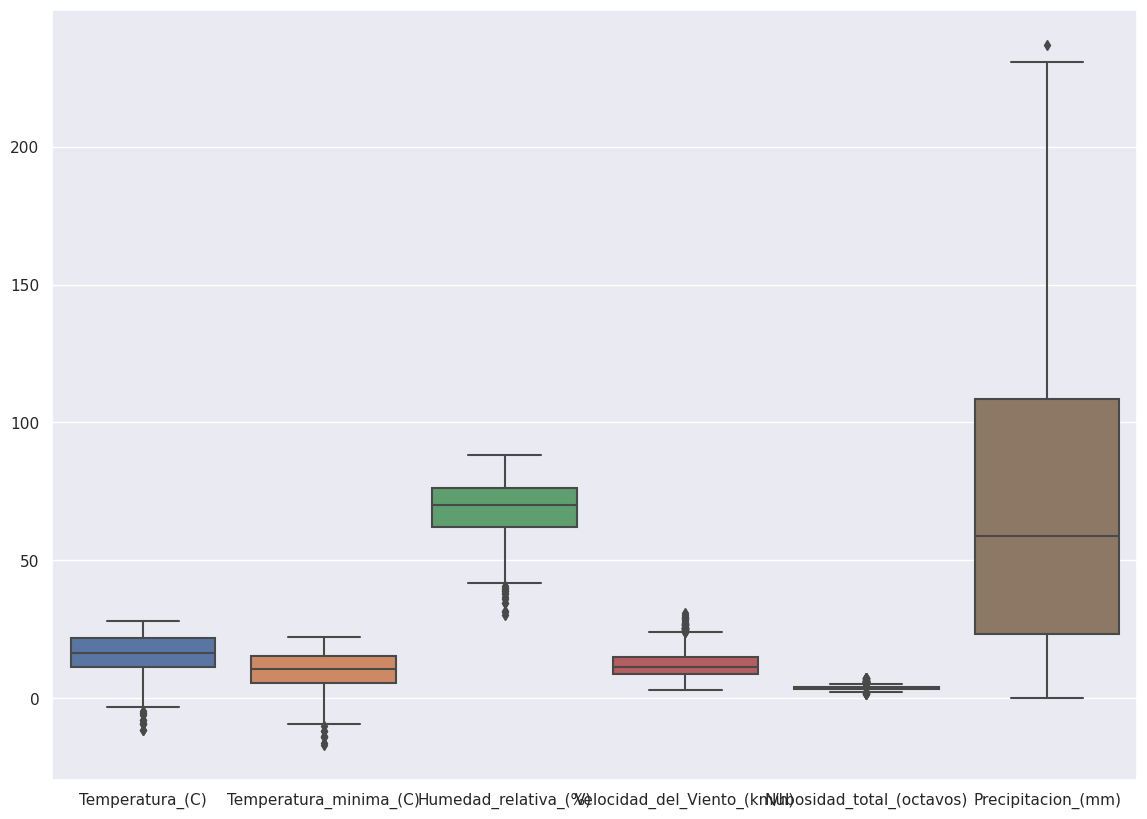

In [268]:
all_data= df.iloc[:, np.r_[2,3,8, 10:15]]
labels = all_data.columns.tolist()
sns.set(rc={"figure.figsize":(14, 10)}) #width=8, height=4
sns.boxplot(data=all_data)


<Axes: xlabel='Temperatura_minima_(C)', ylabel='Estacion'>

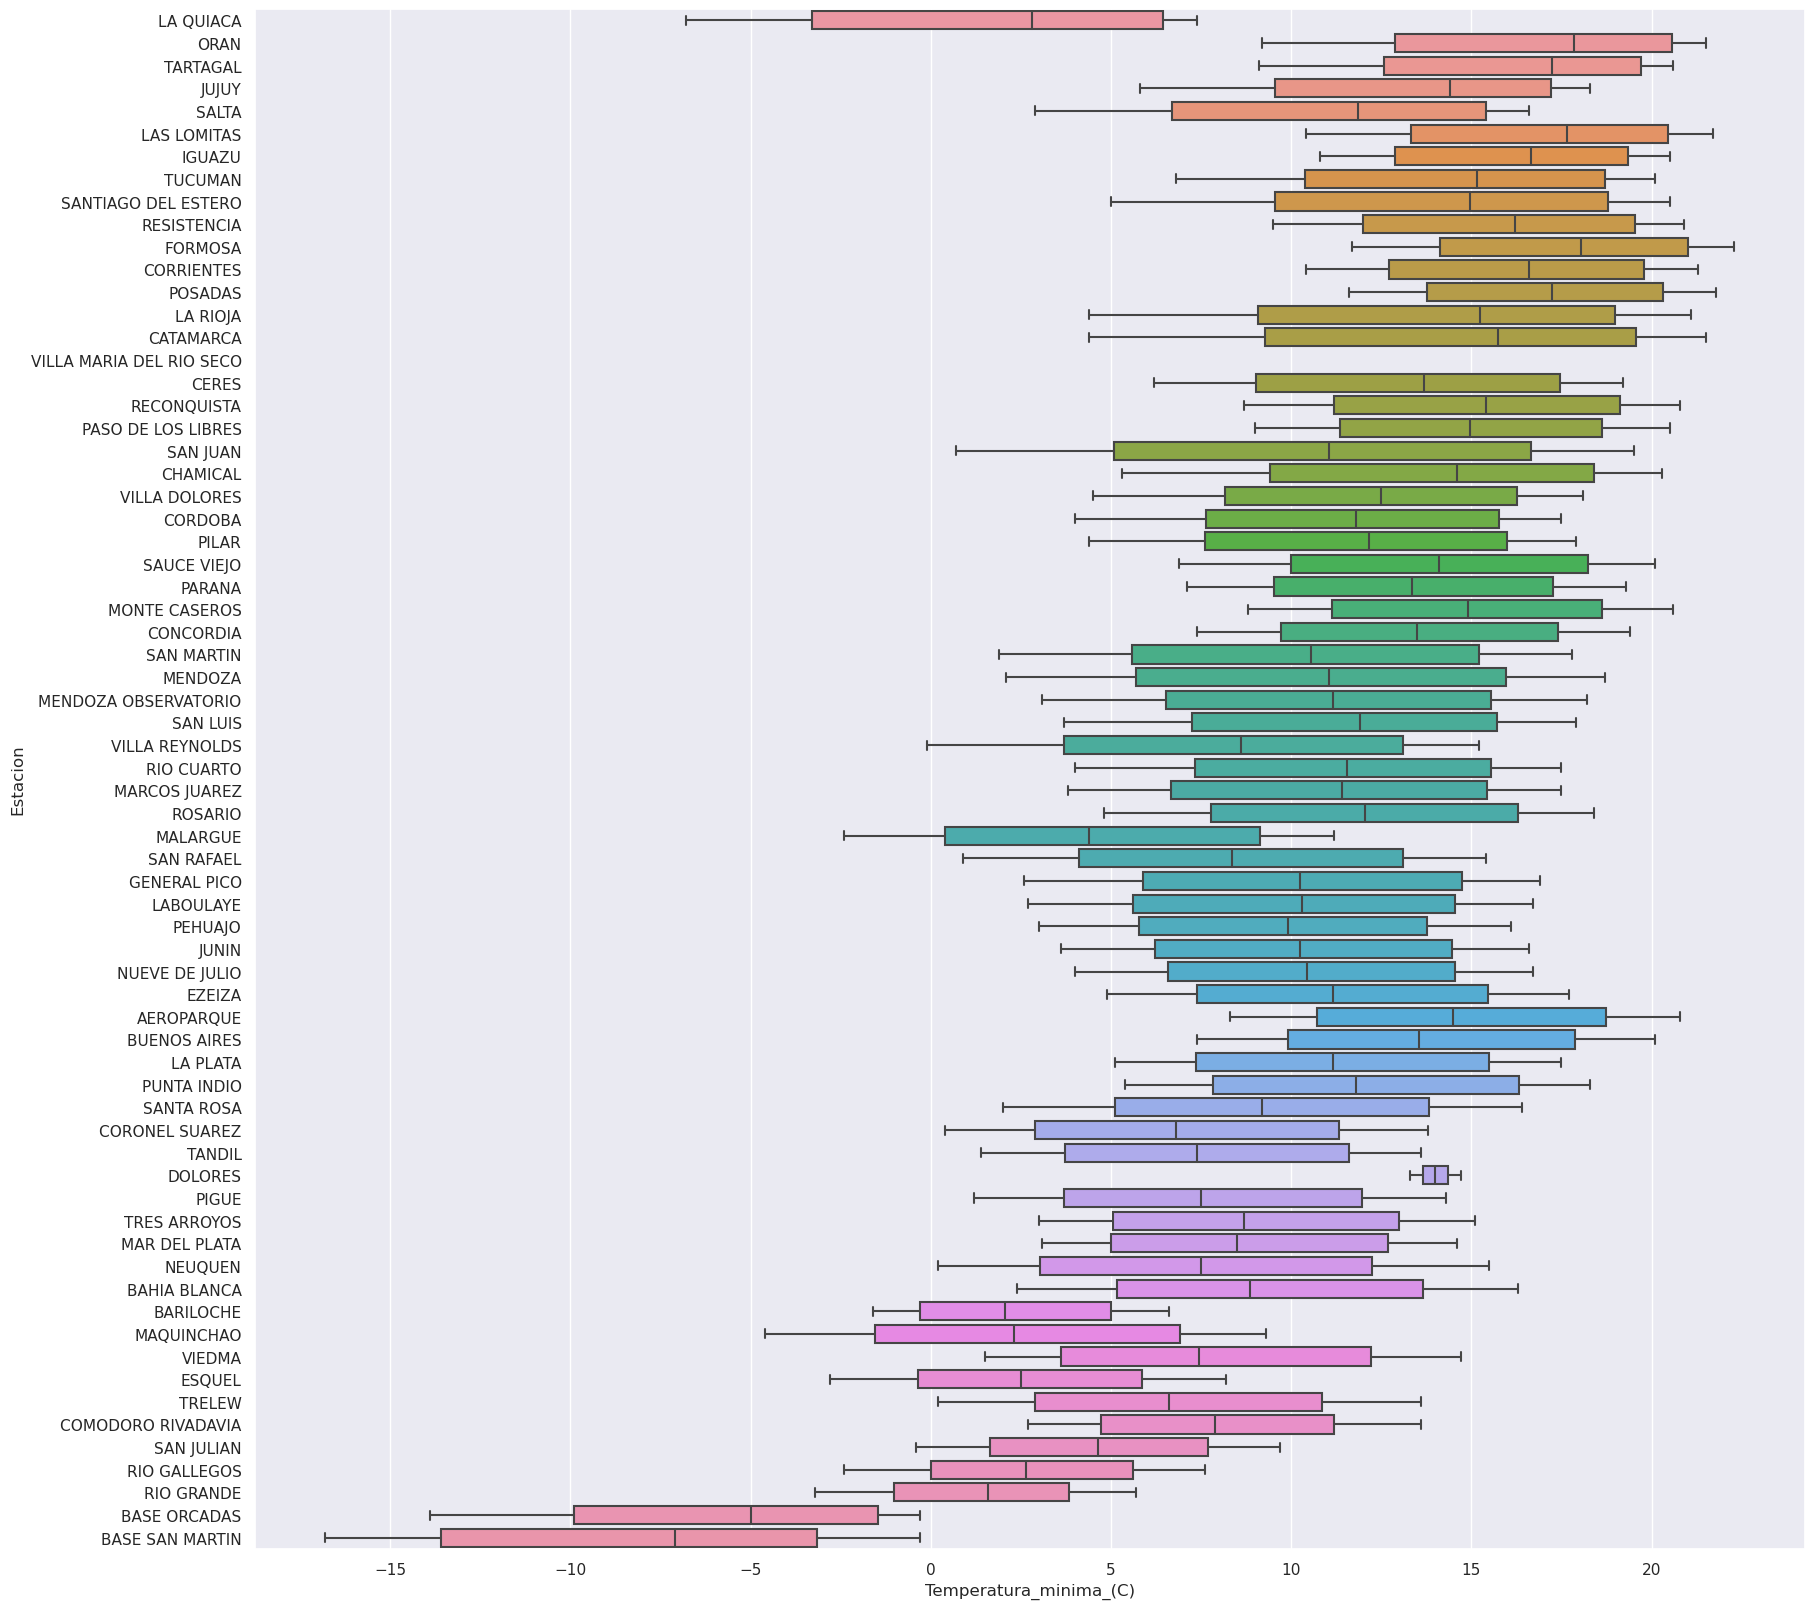

In [208]:
#all_data= df.iloc[:, np.r_[2,3,8, 10:15]]
#labels = all_data.columns.tolist()
sns.set(rc={"figure.figsize":(20, 20)}) #width=8, height=4

sns.boxplot(data=all_data, x="Temperatura_minima_(C)", y="Estacion")


In [184]:
labels = all_data.drop(['lat', 'long'], axis=1).columns


In [197]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Estacion', 'mes', 'lat', 'long',
       'Altura_(m)', 'Numero', 'Temperatura_(C)', 'Temperatura_maxima_(C)',
       'Temperatura_minima_(C)', 'Humedad_relativa_(%)',
       'Velocidad_del_Viento_(km/h)', 'Nubosidad_total_(octavos)',
       'Precipitacion_(mm)', 'Frecuencia_dias_Precipitacion_>0.1_mm',
       'outlier', 'mapCondition', 'mapLegend', 'percentil'],
      dtype='object')

In [ ]:
#lo que hay q ver es que los outliers quizas no son tal cosa..dada las diferencias climatologicas de cada estacion
#en tal caso habria que comparar por estacion los valores
#a su vez, no se reemplazo el sd por 0 sino que se puso null


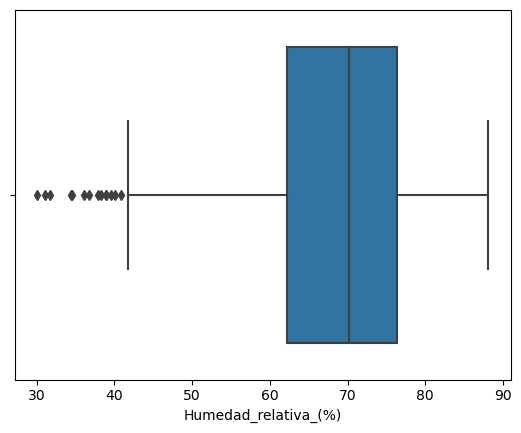

In [195]:
#GRAFICOS BOXPLOt
sns.boxplot(x= df["Humedad_relativa_(%)"])
plt.show()

In [ ]:
sns.boxplot(data=all_data, x="Humedad_relativa_(%)", y="class")

In [ ]:
type(result)

In [ ]:
#grouypby
data.sort_values(by='neighbourhood_hosts').groupby('neighbourhood_hosts').agg({'maxPrice': max, 'minPrice':min})
                     maxPrice  minPrice


                  
# **Librerias utiles:**

Pandas

https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html#

Numpy

https://numpy.org/


***

# *2) Revisar la idea de Objetos" en python a partir de ejemplos*

Object-based programming languaje

objeto (pd, plt, np, etc) luego del punto se desprenden funcionalidades asociadas a cada objeto

***
***
# *3) manejor de tablas/arrays/vectores*

Comentar comandos: head(), tail(), shape(), info(), loc[], iloc[], describe(),.values, columns,

Comantar comandos de numpy

***

In [ ]:
df.tail(10), df.shape

In [ ]:
df.shape

***
# *4) loops*

for ... in ...:

    itera sobre lo que uno quiera
    
    
Sobre què se puede iterar??

 
 a- lista
 
 b- columnas de una tabla
 
 c- palabras de una oracion
 
 

In [ ]:
#        Descomantar a medida que avanzamos con la explicacion
#·--------------------------------------------------------------------
# df.columns   # esto es una lista con nombres

#·--------------------------------------------------------------------
# iteramos sobre la lista:

#for col in df.columns:
#    print(col)

#·--------------------------------------------------------------------
# iteramos sobre las columnas:
#for col in df.columns:
#    print(df[col])
  
#·--------------------------------------------------------------------    
# iteramos sobre las filas:
    
#for rows in df.iloc:
#    print(rows)   

# iteramos sobre oraciones:
    
#oracion= " Mañana va a estar nubleado, por eso no voy a ir a clase"
#oracion[0]
#for palabra in oracion:
#    print(palabra)

***
# *5) Graficos:*
    
https://matplotlib.org/

***

In [ ]:
df.columns

In [ ]:
#ejemplo: df.Per  #  df.Per.values

plt.boxplot(df.Per)
#plt.hist()
#plt.scatter()
#plt.bar()


#

***
# *6) guardado de la informacion (tablas, graficos, modelos)*

***

In [ ]:
df.to_csv(...)
df.to_excel(...)

# GUardamos figuras *******

plt.savefig('foo.png', bbox_inches='tight')

***

# *7) Armado de una funciòn*


def funcion(...):

    ...
    
    ...
    
    return ...
    
  ***